# Regresión Logística y Estimación de Parámetros por Fisher Scoring

__Por:__ _Ayar Yuman Paco Sanizo_

__Club de Ciencia de Datos La Paz__

## 1. Definicón del Modelo

Una regresión logística es un caso particular de un tipo de modelos estadísticos más generales denominados modelos linesles generalizados (GLM). De esta forma, una regresión logística consiste de tres componentes:

* Componente aleatorio
* Componente sistémico
* Función de enlace

A continuación desglosamos cada uno para el caso de una regresión logística.

__Componente Aleatorio__

Este componente esta conformado por variables aleatorias que siguen una distribución bernoulli. Esto es,

$$
Y_i \sim Ber(\pi_i) \quad ,i=1,...,n
$$

Estas variables representan las variables de respuesta del modelo.

__Componente Sistémico__

Este componenete consite en transformaciones lineales de la forma:

$$
z_i = \theta_0 +\theta_1 x_{i1}+\theta_2 x_{i2}+...+\theta_{p-1} x_{i(p-1)} = \theta'\mathbf{x}_i \quad ,i=1,...,n
$$

Donde $\theta$ es un vector de parámetros y $\mathbf{x}_i$ es el vector predictor o regresor de la observación $i$ de acuerdo al modelo.

__Función de Enlace__

Por último la función de enlace que conecta el componente aleatorio con el componente sistémico en una regresión logística es el Logit. Este enlace es como sigue:

$$
Logit(u_i) = Logit(\pi_i) = \log \big(\frac{\pi_i}{1-\pi_i}\big) = z_i = \theta'\mathbf{x}_i \quad ,i=1,...,n
$$

Donde $u_i$ es el valor esperado de la variable aleatoria de respuesta $i$, es decir $u_i = \mathrm{E}[Y_i]$ 


## 2. Estimación de parámetros

__Función Sigmoide__

Sea $Logit(\pi_i)=z_i$, despejando $\pi_i$, tenemos:

$$
\pi_i = \sigma(z_i) = \frac{e^{z_i}}{1+e^{z_i}} = \frac{1}{1+e^{-z_i}}
$$

Luego $\sigma(z_i)$ se denomina función sigmoide.

__Estimación por Máxima Verosimilitud__

Notemos que tomando el componente aleatorio podemos obtener una función de verosimilitud. Esto es:

$$
L(\pi_1,...\pi_n) = \prod_{i=1}^{n} L_i(\pi_i) = \prod_{i=1}^{n}\pi_{i}^{y_i} (1-\pi_i)^{1-y_i}
$$

Aplicando logaritmos y sustituyendo $l=Log(L)$, tenemos:

$$
\begin{align}
l(\pi_1,...\pi_n) &= \sum_{i=1}^{n} l_i(\pi_i) \\
&= \sum_{i=1}^{n} y_i \log(\pi_{i}) + (1-y_i) \log (1-\pi_i) \\
\end{align}
$$

Luego, cada $\pi_i$ es función de $z_i=\theta'\mathbf{x}_i $. Entonces la función de verosimilitud $l(\pi_1,...\pi_n)$ es una función de $\theta$, es decir:

$$
l(\pi_1,...\pi_n) = l(\theta)
$$

De esta forma, podemos obtener un estimador de maxima verosimilitud para el vector $\theta$. Esto es:

$$
\DeclareMathOperator*{\argmax}{argmax}
\hat \theta = \argmax_{\theta} l(\theta)
$$

Ahora, en "machine learning" normalmente hablamos de una función de costo que tratamos de minimizar. Para mantener esta idea definiremos una función $J(\theta)$ definida como:

$$
J(\theta) =  -l(\theta)
$$

Luego, de forma análoga obtendremos el estimador de $\theta$,

$$
\DeclareMathOperator*{\argmin}{argmin}
\hat \theta = \argmin_{\theta} J(\theta)
$$

## 3. Algoritmos de Estimación

### 3.1 Gradient Descent

El algoritmo de "Gradient Descent" es como sigue:

   1. Inicializar $\theta$ aleatoriamente
   2. Definir $\alpha$ y el número de iteraciones $epocs$
   3. Para $k$ de $1$ a $epocs$:
        * $\theta := \theta-\alpha*\frac{\partial}{\partial \theta}J(\theta)$
        
Luego, el único reto es obtener la primera derivada de $J(\theta)$ respecto a $\theta$.

__Primera Derivada__

Sea,
$$
\begin{align}
J(\theta) &=\sum_{i=1}^{n} J_i(\theta) \\
J(\theta_0, ..., \theta_{p-1}) &=\sum_{i=1}^{n} J_i(\theta_0, ..., \theta_{p-1})
\end{align}
$$

,donde $J_i(\theta) =  -l_i(\theta)$. Derivando respecto a  $\theta_j$, tenemos:

$$
\begin{align}
\frac{\partial J(\theta)}{\partial \theta_j} = \sum_{i=1}^{n} \frac{\partial J_i(\theta)}{\partial \theta_j}
\end{align}
$$

Entonces, obtetangamos la derivada de $J_i(\theta)$ respecto a $\theta_j$,

$$
\begin{align}
\frac{\partial J_i(\theta)}{\partial \theta_j} &= -\frac{\partial}{\partial \theta_j} \big( y_i \log(\pi_{i}) + (1-y_i) \log (1-\pi_i)\big) \\
&= -\frac{\partial}{\partial \theta_j} \big(y_i \log \big( \frac{\pi_{i}}{1-\pi_i} \big) + \log (1-\pi_i)\big) \\
&= -\frac{\partial}{\partial \theta_j} \big( y_i \theta'\mathbf{x}_i + \log (1-\sigma(\theta'\mathbf{x}_i))\big)\\
&= -\big[ y_i x_{ij} - \frac{1}{1-\sigma(\theta'\mathbf{x}_i)}\frac{\partial}{\partial \theta_j}\sigma(\theta'\mathbf{x}_i)\big]
\end{align}
$$

Ahora,

$$
\begin{align}
\frac{\partial \sigma(\theta'\mathbf{x}_i)}{\partial \theta_j}&=\frac{\partial}{\partial \theta_j} \Big(\frac{1}{1+e^{-\theta'\mathbf{x}_i}}\Big) \\
&=\frac{e^{-\theta'\mathbf{x}_i}}{(1+e^{-\theta'\mathbf{x}_i})^2}  x_{ij} \\
&=\big(1-\sigma(\theta'\mathbf{x}_i)\big)\sigma(\theta'\mathbf{x}_i) x_{ij}
\end{align}
$$

Sustituyendo y simplificando, tenemos:

$$
\frac{\partial J_i(\theta)}{\partial \theta_j} = -x_{ij} \big( y_i  - \sigma(\theta'\mathbf{x}_i) \big)
$$

Luego,

$$
\begin{align}
\frac{\partial J(\theta)}{\partial \theta_0} &= -\sum_{i=1}^{n} x_{i0} \big( y_i  - \sigma(\theta'\mathbf{x}_i) \big)\\
\frac{\partial J(\theta)}{\partial \theta_1} &= -\sum_{i=1}^{n} x_{i1} \big( y_i  - \sigma(\theta'\mathbf{x}_i) \big)\\
&\vdots\\
\frac{\partial J(\theta)}{\partial \theta_j} &= -\sum_{i=1}^{n} x_{ij} \big( y_i  - \sigma(\theta'\mathbf{x}_i) \big)\\
&\vdots\\
\frac{\partial J(\theta)}{\partial \theta_{p-1}} &= -\sum_{i=1}^{n} x_{i{(p-1)}} \big( y_i  - \sigma(\theta'\mathbf{x}_i) \big)
\end{align}
$$

Matricialmente,

$$
\frac{\partial J(\theta)}{\partial \theta_0} = -\mathbf{X}' \big( \mathbf{Y}  - \sigma(\mathbf{X}\theta) \big)
$$

### 3.2 Fisher Scoring

El método optimización de Fisher Scoring es una variante del método Newton Raphson. De esta forma, primero entendamos la idea principal del método Newton Raphson.

__Newton Raphson__

Sea $l(\theta)$ una función que deseamos optimizar respecto al escalar $\theta$. Aplicando una expanción de Taylor de segundo orden cerca de un punto $\theta_0$, tenemos:

$$
l(\theta) \approx 
l(\theta_0) +(\theta-\theta_0) \frac{\partial l(\theta)}{\partial \theta}\Bigr|_{\substack{\theta=\theta_0}}
+ \frac{1}{2} (\theta-\theta_0)^2 \frac{\partial^2 l(\theta)}{\partial \theta^2}\Bigr|_{\substack{\theta=\theta_0}}
$$

Derivando la aproximación respecto a $\theta$, igualando a cero y denominando la solución $\theta_1$,

$$
\frac{\partial l(\theta)}{\partial \theta} \Bigr|_{\substack{\theta=\theta_0}}
+ (\theta_1-\theta_0) \frac{\partial^2 l(\theta)}{\partial \theta^2} \Bigr|_{\substack{\theta=\theta_0}} = 0
$$

Despejando $\theta_1$,

$$
\theta_1 = \theta_0 + \Bigr[-\frac{\partial^2 l(\theta)}{\partial \theta^2}\Bigr|_{\substack{\theta=\theta_0}} \Bigr]^{-1} \frac{\partial l(\theta)}{\partial \theta}\Bigr|_{\substack{\theta=\theta_0}}
$$

Repitiendo este proceso varias veces tenemos nuevos valores de $\theta_{n+1}$ que optimizan mejor a la función $l(.)$. Luego, en general tenemos la siguiente ecuación de actualización:

$$
\theta_{n+1} = \theta_{n} + \Bigr[-\frac{\partial^2 l(\theta)}{\partial \theta^2}\Bigr|_{\substack{\theta=\theta_{n}}} \Bigr]^{-1} \frac{\partial l(\theta)}{\partial \theta}\Bigr|_{\substack{\theta=\theta_{n}}}
$$

De forma análoga, si $\theta$ es un venctor, tenemos:

$$
\theta_{n+1} = \theta_{n}
+ \Bigr[-\frac{\partial^2 l(\theta)}{\partial \theta \partial \theta'}\Bigr|_{\substack{\theta=\theta_{n}}} \Bigr]^{-1} \frac{\partial l(\theta)}{\partial \theta}\Bigr|_{\substack{\theta=\theta_{n}}}
$$

Ahora, el método de Newton Raphson tiene dos inconvenientes importantes:

* Al maximizar o minimizar no podemos asegurar que $\Bigr[-\frac{\partial^2 l}{\partial \theta \partial \theta'}\Bigr|_{\substack{\theta=\theta_{n}}} \Bigr]$ sea definida positiva o negativa, respectivamente.
* Calcular $\Bigr[-\frac{\partial^2 l(\theta)}{\partial \theta \partial \theta'}\Bigr|_{\substack{\theta=\theta_{n}}} \Bigr]^{-1}$ es costoso computacionalmente.

Por estos motivos surge la necesidad de plantear estrategias diferentes. 

__Fisher Scoring__

Esta variante del método Newton Raphson considera la siguiente ecuación de actualización:

$$
\theta_{n+1} = \theta_{n}
+ \mathrm{E} \Bigr[-\frac{\partial^2 l(\theta)}{\partial \theta \partial \theta'}\Bigr|_{\substack{\theta=\theta_{n}}} \Bigr]^{-1} \frac{\partial l(\theta)}{\partial \theta}\Bigr|_{\substack{\theta=\theta_{n}}}
$$

Ahora, notemos lo siguiente:

* $I(\theta_n) = \mathrm{E} \Bigr[-\frac{\partial^2 l(\theta)}{\partial \theta \partial \theta'}\Bigr|_{\substack{\theta=\theta_{n}}} \Bigr]$ (Información de Fisher)
* $S(\theta_n) = \frac{\partial l(\theta)}{\partial \theta}\Bigr|_{\substack{\theta=\theta_{n}}}$ (Función Score)

De esta forma, la ecuación de actualización queda como:

$$
\theta_{n+1} = \theta_{n} + I(\theta_n)^{-1} S(\theta_n)
$$

Las ventajas de este método son:

* Podemos asegurar que $I(\theta_n)$ es definida positiva al maximizar o negativa al minimizar.
* Siempre que la función de distribución asociada al componente aleatorio pertenesca a la familia exponencial podemos aprovechar que $I(\theta) = \mathrm{E} \Bigr[-\frac{\partial^2 l(\theta)}{\partial \theta \partial \theta'} \Bigr] = \mathrm{E} \Bigr[\Big(\frac{\partial l(\theta)}{\partial \theta}\Big) \Big(\frac{\partial l(\theta)}{\partial \theta}\Big)'\Bigr]$. Luego, podemos usar la aproximación $I(\theta)_{aprox} = \frac{1}{n}\sum_{i=1}^{n} \Big(\frac{\partial l(\theta)}{\partial \theta}\Big) \Big(\frac{\partial l(\theta)}{\partial \theta}\Big)'$ evitando así el cálculo de una segunda derivada. Este enfoque suele denominarse Fisher Scoring Empírico.

Finalmente, en una regresión logistica puede demostrarse que:

$$
\mathrm{E} \Bigr[-\frac{\partial^2 l(\theta)}{\partial \theta \partial \theta'}\Bigr|_{\substack{\theta=\theta_{n}}} \Bigr]=\Bigr[-\frac{\partial^2 l(\theta)}{\partial \theta \partial \theta'}\Bigr|_{\substack{\theta=\theta_{n}}} \Bigr]
$$

Por tanto, en este caso, el método Fisher Scoring es equivalente al método Newton Raphson. Luego, para implementar este método solo necesitamos obtener la expresión de la segunda derivada.

__Segunda Derivada__

Recordemos que estamos considerando la función de costo $J(\theta)=-l(\theta)$.

La segunda derivada, el hessiano, es:

$$
\frac{\partial^2 J(\theta)}{\partial \theta \partial \theta'}=\Bigr[\frac{\partial^2 J(\theta)}{\partial \theta_j \partial \theta_k} \Bigr] \quad,\quad k,j=0,...,(p-1)
$$

Esto es, una matriz compuesta por los elementos $\frac{\partial^2 J(\theta)}{\partial \theta_j \partial \theta_k}$. Luego,

$$
\begin{align}
\frac{\partial^2 J(\theta)}{\partial \theta_j \partial \theta_k}&=
\frac{\partial}{\partial \theta_k}\frac{\partial J(\theta)}{\partial \theta_j}\\
&=\frac{\partial}{\partial \theta_k}\Big(-\sum_{i=1}^{n} x_{ij} \big( y_i  - \sigma(\theta'\mathbf{x}_i) \big)\Big)\\
&=\sum_{i=1}^{n} x_{ij}\frac{\partial}{\partial \theta_k} \sigma(\theta'\mathbf{x}_i)\\
&=\sum_{i=1}^{n} x_{ij}\big(1-\sigma(\theta'\mathbf{x}_i)\big)\sigma(\theta'\mathbf{x}_i) x_{ik}\\
&=\sum_{i=1}^{n} x_{ij}v_i(\theta) x_{ik}
\end{align}
$$

Donde,

$$
v_i(\theta) = v(\theta'\mathbf{x}_i) = \big(1-\sigma(\theta'\mathbf{x}_i)\big)\sigma(\theta'\mathbf{x}_i)
$$

Luego,

$$
\frac{\partial^2 J(\theta)}{\partial \theta \partial \theta'}=\Bigr[\sum_{i=1}^{n} x_{ij}v_i(\theta) x_{ik}\Bigr]
$$

Matricialmebte,

$$
\frac{\partial^2 J(\theta)}{\partial \theta \partial \theta'}=\mathbf{X}'\mathbf{V}(\theta)\mathbf{X}
$$

donde,

$$
\mathbf{V}(\theta)= diag \big( v_1(\theta),...,v_n(\theta) \big) 
$$

## 4. Implementación de Algoritmos de Estimación

In [327]:
# Importar librerias

# Librerias para la implementación
import numpy as np
import numpy.linalg as LA
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Librerias para verificar resultados
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale

### 4.1 Funciones Auxiliares

In [222]:
# Función sigmoide para calcular el estimador de p
def sigmoid(X, theta):
    m = X.dot(theta)
    p = 1/(1+np.exp(-m))
    return(p)

In [287]:
# Función de costo (-logverosimilitud)
def J(y, X, theta, m):
    p = sigmoid(X, theta)
    J = -(y.T.dot(np.log(p))+(m-y).T.dot(np.log(1-p)))
    return(J)

In [224]:
# Función gradiente
def gradient(y, X, theta, m):
    p = sigmoid(X, theta)
    grad = -X.T.dot(y - m*p)
    return(grad)

In [243]:
# Información de Fisher
def ifisher(y, X, theta, m):
    p = sigmoid(X, theta)
    V = (m*p * (1 - p)).T
    V = np.diag(V[0])
    IF = X.T.dot(V).dot(X)
    return(IF)

### 4.2 Gradient Descent

In [226]:
# Gradient descent
def grad_descent(y, X, theta, m=1, alpha=0.01, epocs=1000, eps=1e-7):
    
    gradiente = gradient(y, X, theta, m)
    
    # Definir historial de costos y thetas
    costos = []
    costo = float(J(y, X, theta, m))
    costos.append(costo)
    
    theta_hist = pd.DataFrame(theta.T)
    
    # Contador
    i=0
    
    while(LA.norm(gradiente)>eps and i<epocs):
        
        # Actualizar beta
        theta = theta - alpha*gradiente
        
        # Calcular gradiente
        gradiente = gradient(y, X, theta, m)
        
        # Actualizar historial
        costo = float(J(y, X, theta, m))
        costos.append(costo)
        theta_hist = theta_hist.append(pd.DataFrame(theta.T),ignore_index=True) 
        
        # Incrementar contador
        i=i+1
    
    # Mostrar historial de betas
    print(theta_hist)
    
    # Graficar evolución del costo
    plt.plot(costos)
    
    return(theta, costo)

### 4.3 Fisher Scoring

In [321]:
# Fisher Scoring
def fisher_scoring(y, X, theta, m=1, eps1=1e-7, maxit=100):
    
    # Calcular función Score
    score = gradient(y, X, theta, m)
    
    # Calcular Información de Fisher
    I =  ifisher(y, X, theta, m)
    
    # Definir historial de thetas
    theta_hist = pd.DataFrame(theta.T)
    
    # Definir historial de costos
    costos= []
    costo = float(J(y, X, theta, m))
    costos.append(costo)
    
    # Contador
    i=1
    
    # Bucle de optimización
    while(LA.norm(score)>eps1 and i<maxit):
        
        # Actualizar beta
        theta = theta - LA.inv(I).dot(score)
        
        # Calcular función Score
        score = gradient(y, X, theta, m)
        
        # Calcular Información de Fisher
        I =  ifisher(y, X, theta, m)
        
        # Actualizar historial
        theta_hist=theta_hist.append(pd.DataFrame(theta.T),ignore_index=True) 
        
        costo = float(J(y, X, theta, m))
        costos.append(costo)  
        
        # Incrementar contador
        i=i+1
    
    # Mostrar historial de betas
    print(theta_hist)    
    
    # Graficar evolución del costo
    plt.plot(costos)
    
    # Retornar el beta óptimo y el costo alcanzado
    return(theta, costo)

## 5. Ejemplos numéricos

Una vez definidos los algoritmos procedemos a verificiar si podemos obtener estimadores adecuadamente. A continuación se consideran datos donde las varaibles de respuesta que siguen distribuciones Bernoulli y distribuciones Binomiales.

### 5.1 Datos con respuestas Bernoulli

En el siguiente conjunto de datos de chats de parejas de amigos tenemos:

__Variable de respuesta__

* $LeGusta_i$: Indicatriz de que en la pareja $i$ a la chica le gusta el chico. 

__Variables predictoras__

* $EnVisto_i$: Indicatriz de que en la pareja $i$ la chica dejo en visto al chico.
* $PromPalabras_i$: Promedio de palabras que la chica escribe al chico por semana en la pareja $i$.

In [414]:
# Lectura de datos
data = pd.DataFrame(np.matrix([[1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
                               [1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0],
                               [70,80,50,60,40,65,75,80,70,60,65,50,45,35,40,50,55,45,50,60]]).T,
                    columns=['LeGusta','EnVisto','PromPalabras'])
data

,LeGusta,EnVisto,PromPalabras
0,1,1,70
1,1,1,80
2,1,1,50
3,1,0,60
4,1,0,40
5,1,0,65
6,1,0,75
7,1,0,80
8,1,0,70
9,1,0,60


#### 5.1.1 Estimación de parámetros

In [393]:
# Preparación de variables
y =np.array(data['LeGusta'])
y.shape = (len(y),1)

x1 = np.array(data['EnVisto'])
x2 = np.array(data['PromPalabras'])

X = np.stack((np.ones(len(y)),x1,x2)).T

In [394]:
# Definición de un theta inicial
theta_0 = np.array([math.log(sum(y) / sum(1 - y)), 0.0, 0.0])
theta_0.shape=(3,1)
theta_0

array([[0.],
       [0.],
       [0.]])

__Gradient Descent__

                 0         1         2
0     0.000000e+00  0.000000  0.000000
1     0.000000e+00 -0.000002  0.000077
2    -2.218096e-08 -0.000003  0.000154
3    -6.616001e-08 -0.000005  0.000229
4    -1.315607e-07 -0.000006  0.000302
5    -2.180128e-07 -0.000008  0.000374
6    -3.251523e-07 -0.000009  0.000445
7    -4.526214e-07 -0.000011  0.000515
8    -6.000684e-07 -0.000012  0.000584
9    -7.671472e-07 -0.000014  0.000651
10   -9.535180e-07 -0.000015  0.000718
11   -1.158846e-06 -0.000017  0.000783
12   -1.382804e-06 -0.000019  0.000847
13   -1.625068e-06 -0.000020  0.000910
14   -1.885321e-06 -0.000022  0.000971
15   -2.163250e-06 -0.000023  0.001032
16   -2.458550e-06 -0.000025  0.001092
17   -2.770919e-06 -0.000027  0.001151
18   -3.100061e-06 -0.000028  0.001208
19   -3.445684e-06 -0.000030  0.001265
20   -3.807503e-06 -0.000032  0.001321
21   -4.185237e-06 -0.000033  0.001375
22   -4.578609e-06 -0.000035  0.001429
23   -4.987348e-06 -0.000037  0.001482
24   -5.411187e-06 -0.000

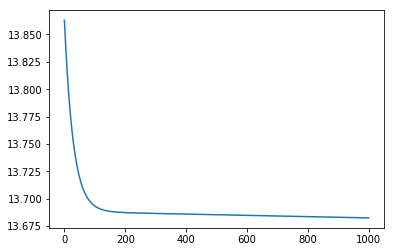

In [395]:
# Estimación por gradient descent
theta_gd, costo_gd = grad_descent(y, X, theta_0, alpha=0.000001,epocs=1000)

In [396]:
# Costo
print(costo_gd)

13.682504886000475


In [397]:
# Gradiente
gradient(y, X, theta_gd, 1)

array([[ 1.28588576],
       [ 2.04221764],
       [-0.03579596]])

In [398]:
# Matriz de confusión
cm_gd = confusion_matrix(y, np.round(sigmoid(X, beta_gd),0))
print(cm_gd)

[[ 0 10]
 [ 0 10]]


In [399]:
# Medida de error
(cm_gd[0,0]+cm_gd[1,1])/y.size

0.5

__Fisher Scoring__

          0         1         2
0  0.000000  0.000000  0.000000
1 -4.518010 -0.696398  0.084391
2 -6.021025 -0.959954  0.112636
3 -6.349819 -1.021373  0.118791
4 -6.363447 -1.024101  0.119044
5 -6.363470 -1.024106  0.119045


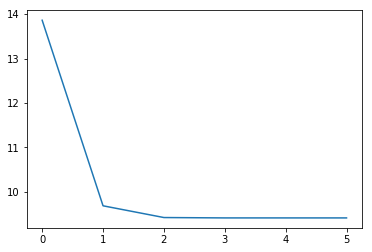

In [400]:
# Estimación por fisher scoring
theta_fs, costo_fs = fisher_scoring(y, X, theta_0)

In [401]:
# Costo
print(costo_fs)

9.410182983850886


In [402]:
# Gradiente
gradient(y, X, theta_fs, 1)

array([[8.09663447e-12],
       [1.36587408e-11],
       [7.60174146e-11]])

In [403]:
# Matriz de confusión
cm_fs = confusion_matrix(y, np.round(sigmoid(X, theta_fs),0))
print(cm_fs)

[[7 3]
 [2 8]]


In [404]:
# Medida de Error
(cm_fs[0,0]+cm_fs[1,1])/y.size

0.75

__Gradient Descent (Segundo Round)__

In [405]:
z1 = x1
z2 = scale(x2)
Z = np.stack((np.ones(len(y)),x1,z2)).T

C:\Users\AYAR\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


             0         1         2
0     0.000000  0.000000  0.000000
1     0.000000 -0.004500  0.017770
2     0.000030 -0.008939  0.035266
3     0.000090 -0.013318  0.052491
4     0.000179 -0.017637  0.069451
5     0.000295 -0.021899  0.086150
6     0.000438 -0.026105  0.102591
7     0.000607 -0.030254  0.118780
8     0.000802 -0.034349  0.134720
9     0.001021 -0.038391  0.150417
10    0.001264 -0.042380  0.165873
11    0.001530 -0.046318  0.181094
12    0.001818 -0.050205  0.196083
13    0.002127 -0.054044  0.210845
14    0.002457 -0.057834  0.225384
15    0.002807 -0.061577  0.239704
16    0.003177 -0.065273  0.253809
17    0.003565 -0.068925  0.267703
18    0.003972 -0.072532  0.281389
19    0.004396 -0.076095  0.294872
20    0.004836 -0.079617  0.308156
21    0.005293 -0.083096  0.321243
22    0.005766 -0.086535  0.334139
23    0.006254 -0.089934  0.346846
24    0.006756 -0.093294  0.359368
25    0.007272 -0.096616  0.371709
26    0.007802 -0.099900  0.383871
27    0.008345 -0.10

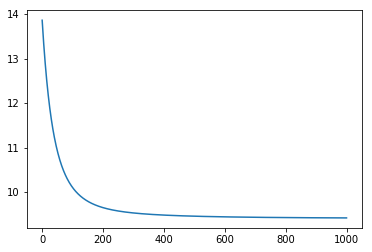

In [406]:
theta_gd, costo_gd = grad_descent(y, Z, theta_0, alpha=0.003,epocs=1000)

In [407]:
print(costo_gd)

9.417008884362357


In [408]:
# Gradiente
gradient(y, Z, theta_gd, 1)

array([[-0.04083576],
       [ 0.08203232],
       [-0.00264568]])

In [409]:
# Matriz de confusión
cm_gd = confusion_matrix(y, np.round(sigmoid(Z, theta_gd),0))
print(cm_gd)

[[7 3]
 [2 8]]


In [410]:
# Medida de error
(cm_gd[0,0]+cm_gd[1,1])/y.size

0.75

#### 5.1.2 Verificación de resultados

A continuación verificamos si obtenemos estimadores próximos a los que se obtenienen usando dos librerías.

__StatsModels__

In [412]:
sm_model = smf.glm(formula = 'LeGusta ~ EnVisto + PromPalabras', data=data, family=sm.families.Binomial())
result = sm_model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                LeGusta   No. Observations:                   20
Model:                            GLM   Df Residuals:                       17
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -9.4102
Date:                Fri, 17 Aug 2018   Deviance:                       18.820
Time:                        22:24:00   Pearson chi2:                     17.6
No. Iterations:                     5                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -6.3635      3.214     -1.980      0.048     -12.663      -0.064
EnVisto         -1.0241      1.171     -0.874 

__Sklearn__

In [257]:
sk_model = LogisticRegression()
sk_model.fit(X[:,1:],y.ravel())
theta_sk=np.zeros([3, 1])
theta_sk[0,0]=sk_model.intercept_
theta_sk[1,0]=sk_model.coef_[0][0]
theta_sk[2,0]=sk_model.coef_[0][1]
theta_sk

array([[-0.89939683],
       [-0.78848242],
       [ 0.02525792]])

In [264]:
# Costo
J(y, X, theta_sk, m=1)

array([[11.5994895]])

In [261]:
# Matriz de confución
cm_sk = confusion_matrix(y, np.round(sigmoid(X, theta_sk),0))
print(cm_sk)

[[6 4]
 [1 9]]


In [265]:
# Medida de Error
(cm_sk[0,0]+cm_sk[1,1])/y.size

0.75

### 5.2 Datos con respuestas Binomiales

En este caso el conjunto de datos corresponde a escarabajos.

__Variable de Respuesta__ 

* $y_i$: Número de escarabajos muertos respecto a un total de $n_i$ expuestos a cierta concentración $i$ de veneno

__Variables Predictoras__ 

* $conc_i$: Concentración $i$ de un veneno
* ${conc_i}^2$: Concentración $i$ del veneno al cuadrado

In [351]:
# Lectura de datos
data=pd.read_csv("SC1_11_beetles.txt",sep=";")
data

,conc,y,n
0,49.06,2,29
1,52.99,7,30
2,56.91,9,28
3,60.84,14,27
4,64.76,23,30
5,68.69,29,31
6,72.61,29,30
7,76.54,29,29
8,49.06,4,30
9,52.99,6,30


#### 5.2.1 Estimación de parámetros

In [380]:
# Preparación de variables
y=np.array(data.y)
y.shape=(len(y),1)

m=np.array(data.n)
m.shape=(len(m),1)

x=data.conc
X=np.stack((np.ones(len(y)),x,x*x)).T
Z=np.stack((np.ones(len(y)),scale(x),scale(x*x))).T

In [381]:
# Definición de un beta inicial
theta_0 = np.array([math.log(sum(y) / sum(m - y)), 0.0, 0.0])
theta_0.shape=(3,1)
theta_0

array([[0.4262992],
       [0.       ],
       [0.       ]])

__Gradient Descent__

             0         1         2
0     0.426299  0.000000  0.000000
1     0.426299  0.048308  0.047906
2     0.426310  0.093310  0.092508
3     0.426392  0.135258  0.134060
4     0.426587  0.174398  0.172810
5     0.426928  0.210963  0.208993
6     0.427433  0.245171  0.242828
7     0.428115  0.277224  0.274519
8     0.428978  0.307307  0.304251
9     0.430023  0.335589  0.332192
10    0.431245  0.362221  0.358494
11    0.432640  0.387340  0.383295
12    0.434200  0.411072  0.406717
13    0.435915  0.433527  0.428873
14    0.437777  0.454806  0.449864
15    0.439777  0.475000  0.469778
16    0.441905  0.494191  0.488698
17    0.444152  0.512453  0.506698
18    0.446509  0.529853  0.523844
19    0.448966  0.546451  0.540197
20    0.451517  0.562303  0.555811
21    0.454153  0.577459  0.570737
22    0.456867  0.591965  0.585019
23    0.459652  0.605862  0.598700
24    0.462502  0.619189  0.611817
25    0.465409  0.631980  0.624404
26    0.468370  0.644268  0.636495
27    0.471377  0.65

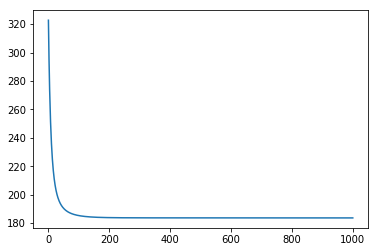

In [382]:
# Estimación por gradient descent
theta_gd2, costo_gd2 = grad_descent(y, Z, theta_0, m=m, alpha=0.0003,epocs=1000)

In [383]:
print(costo_gd2)

183.67334946187438


[]

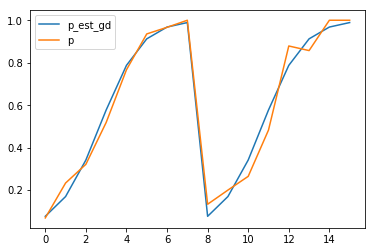

In [384]:
# Gráficos
p_est_gd = sigmoid(Z, theta_gd2)
plt.plot(p_est_gd, label="p_est_gd")
plt.plot(y/m, label="p")
plt.legend()
plt.plot()

In [385]:
# Medida de Error
sum((y/m-p_est_gd)**2)

array([0.04059541])

__Fisher Scoring__

           0         1         2
0   0.426299  0.000000  0.000000
1 -17.648684  0.424804 -0.002140
2 -11.793852  0.178721  0.000312
3   0.204747 -0.243160  0.003985
4   6.735187 -0.472860  0.005988
5   7.933284 -0.515344  0.006361
6   7.968380 -0.516592  0.006372
7   7.968410 -0.516593  0.006372


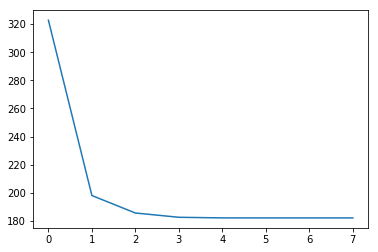

In [386]:
# Estimación
theta_fs2, costo_fs2 = fisher_scoring(y, X, theta_0, m=m)

In [387]:
# Costo
print(costo_fs2)

182.11352913760606


[]

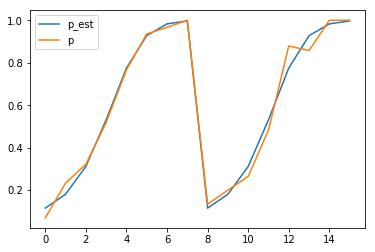

In [388]:
# Graficos
p_est = sigmoid(X, theta_fs2)
plt.plot(p_est,label="p_est")
plt.plot(y/m,label="p")
plt.legend()
plt.plot()

In [389]:
# Medida de Error
print(sum((y/m-p_est)**2))

[0.02685729]


#### 5.2.2 Verificación de resultados

A continuación verificamos si obtenemos estimadores próximos a los que se obtenienen usando una librería.

__StatsModels__

In [390]:
model = sm.GLM(np.stack((data.y,data.n-data.y)).T, X, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['y1', 'y2']   No. Observations:                   16
Model:                            GLM   Df Residuals:                       13
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -24.948
Date:                Fri, 17 Aug 2018   Deviance:                       7.9273
Time:                        20:38:39   Pearson chi2:                    0.243
No. Iterations:                     7                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9684     11.036      0.722      0.470     -13.662      29.599
x1            -0.5166      0.374     -1.383      0.1